In [1]:
!pip install byaldi pdf2image qwen-vl-utils transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 517.9/517.9 kB 35.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 127.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 124.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 100.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 61.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 40.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
!sudo apt install poppler-utils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 186 kB of archives.
After this operation, 697 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.8 [186 kB]
Fetched 186 kB in 1s (151 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package poppler-utils.
(Reading database ... 126308 

In [ ]:
# import requests
# import os

# pdfs = {
#     "Window": "https://www.westoxon.gov.uk/media/ksqgvl4b/10-design-guide-windows-and-doors.pdf",
#     "Roofs": "https://www.westoxon.gov.uk/media/d3ohnpd1/9-design-guide-roofs-and-roofing-materials.pdf",
#     "Extensions": "https://www.westoxon.gov.uk/media/pekfogvr/14-design-guide-extensions-and-alterations.pdf",
#     "Greener": "https://www.westoxon.gov.uk/media/thplpsay/16-design-guide-greener-traditional-buildings.pdf",
#     "Sustainable": "https://www.westoxon.gov.uk/media/nk5bvv0v/12-design-guide-sustainable-building-design.pdf"
# }

# output_dir = "dataset"
# os.makedirs(output_dir, exist_ok=True)

# for name, url in pdfs.items():
#     response = requests.get(url)
#     pdf_path = os.path.join(output_dir, f"{name}.pdf")


#     with open(pdf_path, "wb") as f:
#         f.write(response.content)

In [3]:
!mkdir dataset

In [4]:
# import os
# from pdf2image import convert_from_path
# pdf_folder = "/content/dataset"

# def convert_pdfs_to_images(folder):
#     pdf_files = [f for f in os.listdir(folder) if f.endswith('.pdf')]
#     all_images = {}

#     for doc_id, pdf_file in enumerate(pdf_files):
#         pdf_path = os.path.join(pdf_folder, pdf_file)
#         images = convert_from_path(pdf_path, dpi=100)
#         all_images[doc_id] = images

#     return all_images

# all_images = convert_pdfs_to_images("/content/dataset/")

import os
from pdf2image import convert_from_path

def convert_pdfs_to_images(folder):
    # Option 1: If you have a single specific PDF file
    pdf_file = "BJT.pdf"
    pdf_path = os.path.join(folder, pdf_file)

    # Check if file exists
    if not os.path.exists(pdf_path):
        print(f"Error: PDF file not found at {pdf_path}")
        return {}

    try:
        print(f"Converting: {pdf_file}")
        images = convert_from_path(pdf_path, dpi=100)
        return {0: images}  # Return dict with single entry
    except Exception as e:
        print(f"Error converting {pdf_file}: {str(e)}")
        return {}

# Option 2: Alternative function to process all PDFs in a folder
def convert_all_pdfs_to_images(folder):
    if not os.path.exists(folder):
        print(f"Error: Folder not found at {folder}")
        return {}

    # Get all PDF files in the folder
    pdf_files = [f for f in os.listdir(folder) if f.lower().endswith('.pdf')]

    if not pdf_files:
        print("No PDF files found in the folder")
        return {}

    all_images = {}

    for doc_id, pdf_file in enumerate(pdf_files):
        pdf_path = os.path.join(folder, pdf_file)
        try:
            print(f"Converting: {pdf_file}")
            images = convert_from_path(pdf_path, dpi=100)
            all_images[doc_id] = images
            print(f"Successfully converted {len(images)} pages")
        except Exception as e:
            print(f"Error converting {pdf_file}: {str(e)}")
            continue

    return all_images

# Usage
pdf_folder = "/content/dataset"

# Use the first function for your specific file
all_images = convert_pdfs_to_images(pdf_folder)

# Or use the second function to process all PDFs in the folder
# all_images = convert_all_pdfs_to_images(pdf_folder)

print(f"Conversion complete. Processed {len(all_images)} documents.")

Converting: BJT.pdf
Conversion complete. Processed 1 documents.


Available document IDs: [0]
Document 0: 58 pages


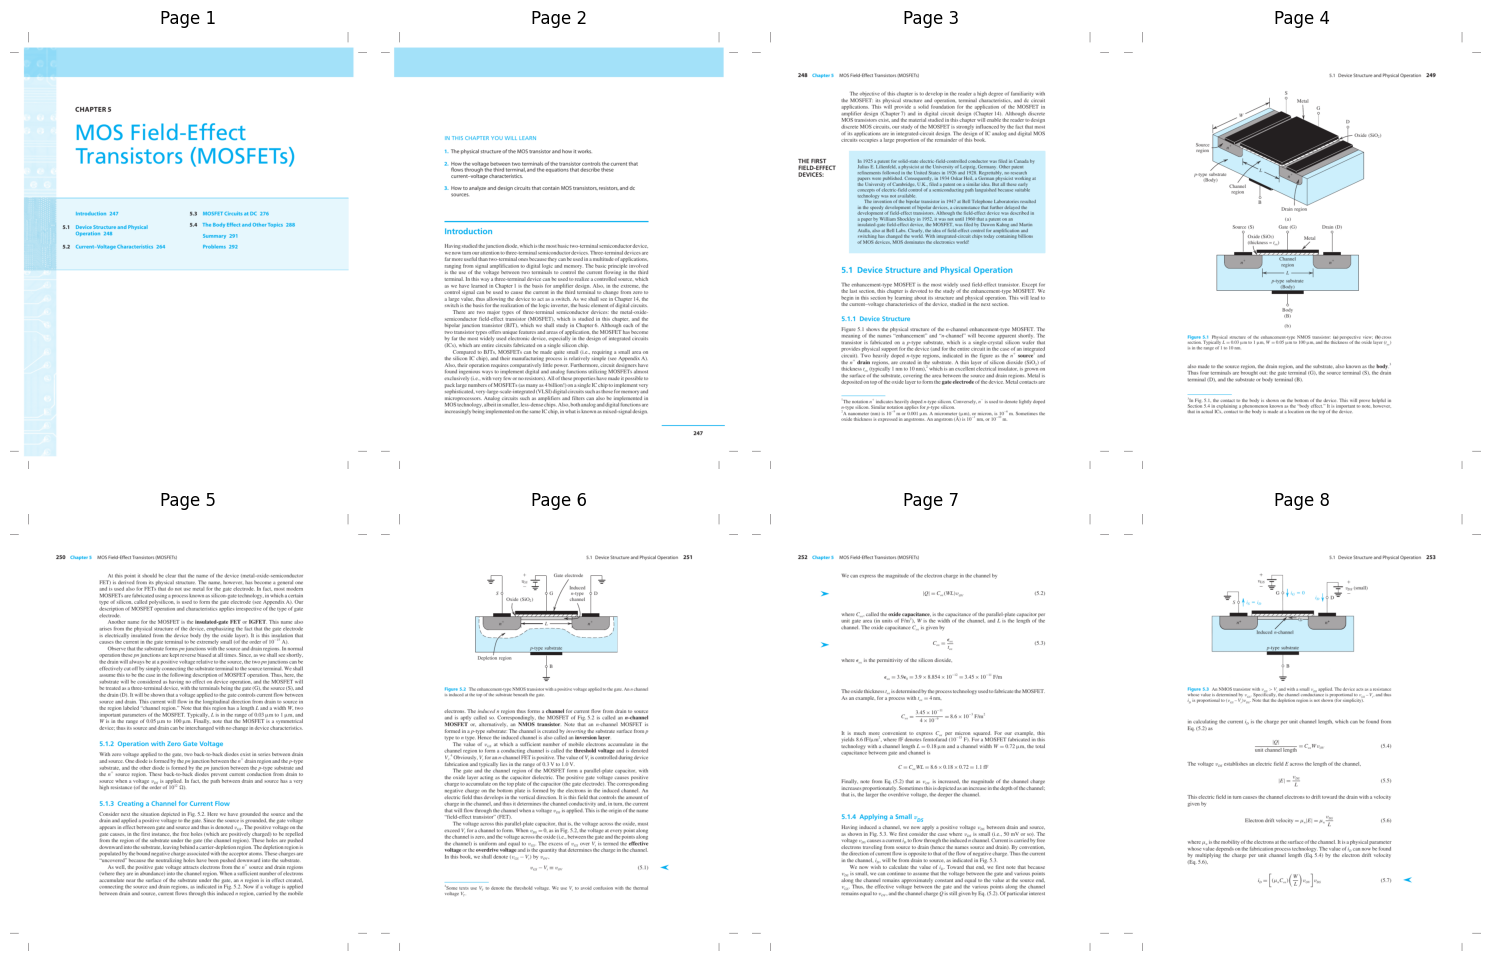

Displayed 8 pages from document 0


In [5]:
# import matplotlib.pyplot as plt

# fig, axes = plt.subplots(2, 4, figsize=(15, 10))

# for i, ax in enumerate(axes.flat):
#     img = all_images[1][i]
#     ax.imshow(img)
#     ax.axis('off')

# plt.tight_layout()
# plt.show()

import matplotlib.pyplot as plt

# First, check what's in all_images
print("Available document IDs:", list(all_images.keys()))
for doc_id, images in all_images.items():
    print(f"Document {doc_id}: {len(images)} pages")

# Check if we have any images
if not all_images:
    print("No images found. Please check if PDF conversion was successful.")
else:
    # Get the first document (key 0, not 1)
    doc_id = list(all_images.keys())[0]  # Get the first available document ID
    images = all_images[doc_id]

    # Determine how many images to display (max 8 for 2x4 grid)
    num_images = min(len(images), 8)

    if num_images == 0:
        print("No images found in the document.")
    else:
        # Create subplot grid based on number of images
        if num_images <= 4:
            rows, cols = 1, num_images
            figsize = (4*num_images, 5)
        else:
            rows, cols = 2, 4
            figsize = (15, 10)

        fig, axes = plt.subplots(rows, cols, figsize=figsize)

        # Handle single subplot case
        if num_images == 1:
            axes = [axes]
        elif rows == 1:
            axes = axes
        else:
            axes = axes.flat

        # Display images
        for i in range(num_images):
            img = images[i]
            axes[i].imshow(img)
            axes[i].axis('off')
            axes[i].set_title(f'Page {i+1}')

        # Hide empty subplots if any
        if num_images < len(axes):
            for i in range(num_images, len(axes)):
                axes[i].axis('off')

        plt.tight_layout()
        plt.show()

        print(f"Displayed {num_images} pages from document {doc_id}")

In [6]:
from byaldi import RAGMultiModalModel

colpali_model = RAGMultiModalModel.from_pretrained("vidore/colpali-v1.3")

Verbosity is set to 1 (active). Pass verbose=0 to make quieter.


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


adapter_config.json:   0%|          | 0.00/751 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/862M [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

adapter_model.safetensors:   0%|          | 0.00/78.6M [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


preprocessor_config.json:   0%|          | 0.00/423 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.json:   0%|          | 0.00/34.6M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/733 [00:00<?, ?B/s]

In [7]:
# colpali_model.index(
#     input_path="dataset/",
#     index_name="image_index",
#     store_collection_with_index=False,
#     overwrite=True
# )

colpali_model.index(
    input_path="dataset/",
    index_name="image_index",
    store_collection_with_index=False,
    overwrite=True
)

Indexing file: dataset/BJT.pdf
Added page 1 of document 0 to index.
Added page 2 of document 0 to index.
Added page 3 of document 0 to index.
Added page 4 of document 0 to index.
Added page 5 of document 0 to index.
Added page 6 of document 0 to index.
Added page 7 of document 0 to index.
Added page 8 of document 0 to index.
Added page 9 of document 0 to index.
Added page 10 of document 0 to index.
Added page 11 of document 0 to index.
Added page 12 of document 0 to index.
Added page 13 of document 0 to index.
Added page 14 of document 0 to index.
Added page 15 of document 0 to index.
Added page 16 of document 0 to index.
Added page 17 of document 0 to index.
Added page 18 of document 0 to index.
Added page 19 of document 0 to index.
Added page 20 of document 0 to index.
Added page 21 of document 0 to index.
Added page 22 of document 0 to index.
Added page 23 of document 0 to index.
Added page 24 of document 0 to index.
Added page 25 of document 0 to index.
Added page 26 of document 0 

{0: 'dataset/BJT.pdf'}

In [8]:
query = "Formula current of mosfet"

results = colpali_model.search(query, k=2)
results

[{'doc_id': 0, 'page_num': 35, 'score': 14.5, 'metadata': {}, 'base64': None},
 {'doc_id': 0, 'page_num': 15, 'score': 14.375, 'metadata': {}, 'base64': None}]

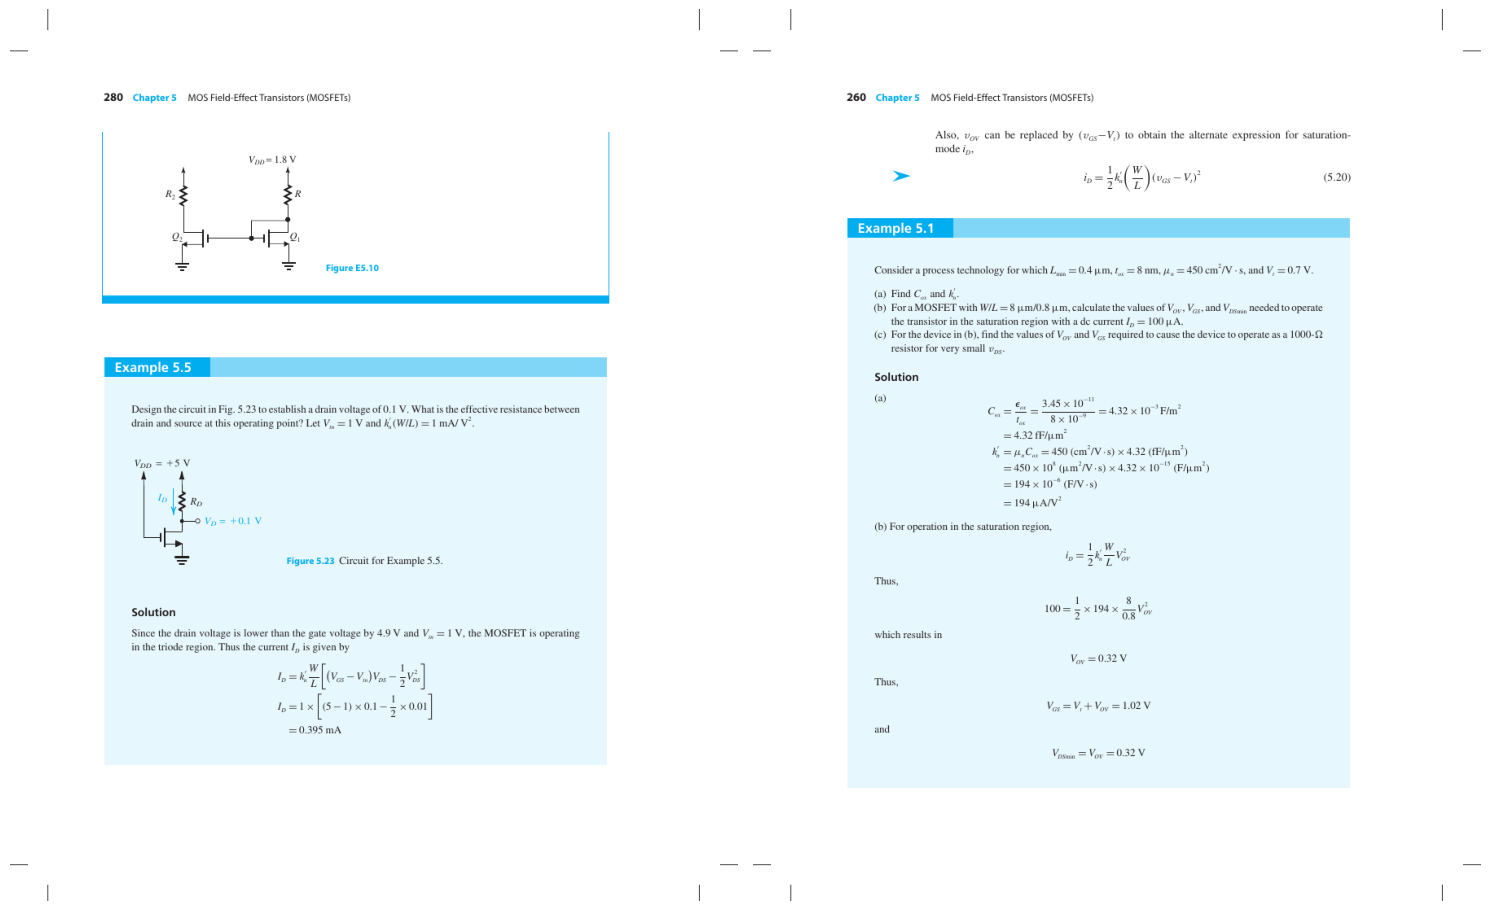

In [9]:
import matplotlib.pyplot as plt

def get_result_images(results, all_images):
    grouped_images = []

    for result in results:
        doc_id = result['doc_id']
        page_num = result['page_num']
        grouped_images.append(all_images[doc_id][page_num - 1])
    return grouped_images

result_images = get_result_images(results, all_images)

fig, axes = plt.subplots(1, 2, figsize=(15, 10))

for i, ax in enumerate(axes.flat):
    img = result_images[i]
    ax.imshow(img)
    ax.axis('off')

plt.tight_layout()
plt.show()

In [10]:
from transformers import Qwen2VLForConditionalGeneration, Qwen2VLProcessor
from qwen_vl_utils import process_vision_info
import torch

vl_model = Qwen2VLForConditionalGeneration.from_pretrained(
    "Qwen/Qwen2-VL-7B-Instruct",
    torch_dtype=torch.bfloat16,
)
vl_model.cuda().eval()

config.json: 0.00B [00:00, ?B/s]

model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

model-00005-of-00005.safetensors:   0%|          | 0.00/1.09G [00:00<?, ?B/s]

model-00004-of-00005.safetensors:   0%|          | 0.00/3.86G [00:00<?, ?B/s]

model-00002-of-00005.safetensors:   0%|          | 0.00/3.86G [00:00<?, ?B/s]

model-00003-of-00005.safetensors:   0%|          | 0.00/3.86G [00:00<?, ?B/s]

model-00001-of-00005.safetensors:   0%|          | 0.00/3.90G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/5 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/244 [00:00<?, ?B/s]

Qwen2VLForConditionalGeneration(
  (visual): Qwen2VisionTransformerPretrainedModel(
    (patch_embed): PatchEmbed(
      (proj): Conv3d(3, 1280, kernel_size=(2, 14, 14), stride=(2, 14, 14), bias=False)
    )
    (rotary_pos_emb): VisionRotaryEmbedding()
    (blocks): ModuleList(
      (0-31): 32 x Qwen2VLVisionBlock(
        (norm1): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (norm2): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (attn): VisionSdpaAttention(
          (qkv): Linear(in_features=1280, out_features=3840, bias=True)
          (proj): Linear(in_features=1280, out_features=1280, bias=True)
        )
        (mlp): VisionMlp(
          (fc1): Linear(in_features=1280, out_features=5120, bias=True)
          (act): QuickGELUActivation()
          (fc2): Linear(in_features=5120, out_features=1280, bias=True)
        )
      )
    )
    (merger): PatchMerger(
      (ln_q): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
      (mlp): Seq

In [11]:
min_pixels = 256*256
max_pixels = 1024*1024
vl_model_processor = Qwen2VLProcessor.from_pretrained(
    "Qwen/Qwen2-VL-7B-Instruct",
    min_pixels=min_pixels,
    max_pixels=max_pixels
)

preprocessor_config.json:   0%|          | 0.00/347 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

chat_template.json: 0.00B [00:00, ?B/s]

In [12]:
chat_template = [
    {
        "role": "user",
        "content": [
            {
                "type": "image",
                "image": result_images[0],
            },
             {
                 "type": "image",
                "image": result_images[1],
            },
            {
                "type": "text",
                "text": query
            },
        ],
    }
]

text = vl_model_processor.apply_chat_template(
    chat_template, tokenize=False, add_generation_prompt=True
)

In [13]:
image_inputs, _ = process_vision_info(chat_template)
inputs = vl_model_processor(
    text=[text],
    images=image_inputs,
    padding=True,
    return_tensors="pt",
)
inputs = inputs.to("cuda")

In [14]:
generated_ids = vl_model.generate(**inputs, max_new_tokens=100)

generated_ids_trimmed = [
    out_ids[len(in_ids) :] for in_ids, out_ids in zip(inputs.input_ids, generated_ids)
]
output_text = vl_model_processor.batch_decode(
    generated_ids_trimmed, skip_special_tokens=True, clean_up_tokenization_spaces=False
)

print(output_text[0])

The formula for the current \( I_D \) of a MOSFET in saturation mode is given by:

\[ I_D = \frac{1}{2} k_n \left( \frac{W}{L} \right) (V_{GS} - V_t)^2 \]

where:
- \( k_n \) is the transconductance parameter,
- \( W \) is the width of the MOSFET,
- \( L \) is the length of the MOS
